<br>
<font size="4">
<p>
# MODULO VIII - Validación

## Support Vector Machine - Definición
Es el proceso en que se un modelo entrenado se evalúa con datos de prueba. Los datos de prueba son una porción de los datos originales de los que también son una porción los datos de entrenamiento. La idea principal es usar los datos de prueba para evaluar la capacidad del modelo para generalizar (Alpaydin, 2014).


## Carga y preprocesamiento de datos

En este tutorial se evaluarán varios modelos en la tarea de clasificación. Para ello se utilizará un dataset que contiene la información de una serie de moléculas para saber si son biodegradables o no en base a su estructura molecular.

Los datos de entrenamiento se pueden descargar de la página de la [Universidad de California, Irvine](https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv) (Mansouri, 2013)

El conjunto de datos tiene 41 atributos:
</p>
<br>
</font>
1) SpMax_L: Leading eigenvalue from Laplace matrix.

2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity.

3) nHM: Number of heavy atoms. 

4) F01[N-N]: Frequency of N-N at topological distance 1.

5) F04[C-N]: Frequency of C-N at topological distance 4. 

6) NssssC: Number of atoms of type ssssC. 

7) nCb-: Number of substituted benzene C(sp2). 

8) C%: Percentage of C atoms. 

9) nCp: Number of terminal primary C(sp3). 

10) nO: Number of oxygen atoms. 

11) F03[C-N]: Frequency of C-N at topological distance 3. 

12) SdssC: Sum of dssC E-states. 

13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass. 

14) LOC: Lopping centric index. 

15) SM6_L: Spectral moment of order 6 from Laplace matrix.

16) F03[C-O]: Frequency of C - O at topological distance 3. 

17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom). 

18) Mi: Mean first ionization potential (scaled on Carbon atom). 

19) nN-N: Number of N hydrazines. 

20) nArNO2: Number of nitro groups (aromatic). 

21) nCRX3: Number of CRX3. 

22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability. 

23) nCIR: Number of circuits. 

24) B01[C-Br]: Presence/absence of C - Br at topological distance 1. 

25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3. 

26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R. 

27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index). 

28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d. 

29) B04[C-Br]: Presence/absence of C - Br at topological distance 4. 

30) SdO: Sum of dO E-states. 

31) TI2_L: Second Mohar index from Laplace matrix. 

32) nCrt: Number of ring tertiary C(sp3). 

33) C-026: R--CX--R. 

34) F02[C-N]: Frequency of C - N at topological distance 2. 

35) nHDon: Number of donor atoms for H-bonds (N and O). 

36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass. 

37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average. 

38) nN: Number of Nitrogen atoms. 

39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass. 

40) nArCOOR: Number of esters (aromatic). 

41) nX: Number of halogen atoms. El atributo 42 corresponde con la etiqueta de clase como biodegradable o no biodegradable.

42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB).

Lo primero que se hace es importar las librerías necesarias.

In [1]:
#Librerias para el manejo de datos y datos numéricos
import pandas as pd
import numpy as np

#Librerias para estandarizacion y reduccion de dimensionalidad
from sklearn.preprocessing import RobustScaler

#Librerias para la Division del dataset en Training y Test y busqueda de parametros con Grid Search
from sklearn.model_selection import train_test_split,GridSearchCV

#Libreria para graficar
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# Importando un clasificador Gaussiano de la libreria Scikit learn
from sklearn.naive_bayes import GaussianNB


#librerias de modulos para SVM
from sklearn import svm
from sklearn.svm import SVC

#libreria para Cross-validation 
from sklearn.model_selection import cross_val_score

#libreria para metricas, matriz de confusion y curva ROC
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix

<br>
<font size="4">
<p>
Para importar el dataset completo es necesario tener el archivo biodeg.csv en la carpeta datasets. Se lee el archivo usando la función de pandas para pasar de archivos en formato csv a dataFrames. En este caso el delimitador es ';'.

In [2]:
df = pd.read_csv('datasets/biodeg.csv',
                       header = None, delimiter=' *; *', engine='python')

<br>
<font size="4">
<p>
La columna número 41 (comenzando desde cero) es la que tiene la categoría de las clases. Los atributos son de tipo real o entero que representan cantidades, siendo la clase la única característica categórica.

In [3]:
df[41].values

array(['RB', 'RB', 'RB', ..., 'NRB', 'NRB', 'NRB'], dtype=object)

In [4]:
df.dtypes

0     float64
1     float64
2       int64
3       int64
4       int64
5       int64
6       int64
7     float64
8       int64
9       int64
10      int64
11    float64
12    float64
13    float64
14    float64
15      int64
16    float64
17    float64
18      int64
19      int64
20      int64
21    float64
22      int64
23      int64
24      int64
25      int64
26    float64
27    float64
28      int64
29    float64
30    float64
31      int64
32      int64
33      int64
34      int64
35    float64
36    float64
37      int64
38    float64
39      int64
40      int64
41     object
dtype: object

<br>
<font size="4">
<p>
En este ejemplo, los nombres de las características no son muy representativos, así que accederemos a las columnas usando índices. 

Para poder entrenar modelos y validarlos es necesario tener un conjunto de datos sin valores nulos.

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [6]:
df.describe()

0            1            2            3            4   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      4.782644     3.069508     0.716588     0.042654     0.980095   
std       0.546916     0.831308     1.462452     0.256010     2.332955   
min       2.000000     0.803900     0.000000     0.000000     0.000000   
25%       4.481000     2.502750     0.000000     0.000000     0.000000   
50%       4.828000     3.046300     0.000000     0.000000     0.000000   
75%       5.125000     3.437650     1.000000     0.000000     1.000000   
max       6.496000     9.177500    12.000000     3.000000    36.000000   

                5            6            7            8            9   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.290047     1.646445    37.055640     1.376303     1.803791   
std       1.073771     2.224822     9.144466     1.963521     1.775435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    30.450000     0.000000     0.000000   
50%       0.000000     1.000000    37.500000     1.000000     2.000000   
75%       0.000000     3.000000    43.400000     2.000000     3.000000   
max      13.000000    18.000000    60.700000    24.000000    12.000000   

          ...                31           32           33           34  \
count     ...       1055.000000  1055.000000  1055.000000  1055.000000   
mean      ...          0.129858     0.883412     1.274882     0.961137   
std       ...          0.644057     1.520467     2.273994     1.257013   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     1.000000   
75%       ...          0.000000     1.000000     2.000000     2.000000   
max       ...          8.000000    12.000000    18.000000     7.000000   

                35           36           37           38           39  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      3.918240     2.558417     0.686256     8.629492     0.051185   
std       0.999602     0.642765     1.090389     1.241986     0.318970   
min       2.267000     1.467000     0.000000     4.917000     0.000000   
25%       3.487500     2.103000     0.000000     7.991000     0.000000   
50%       3.726000     2.458000     0.000000     8.499000     0.000000   
75%       3.987000     2.870500     1.000000     9.020500     0.000000   
max      10.695000     5.825000     8.000000    14.700000     4.000000   

                40  
count  1055.000000  
mean      0.723223  
std       2.239286  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      27.000000  

[8 rows x 41 columns]

<br>
<font size="4">
<p>
Las características se encuentran en escalas muy diferentes, haciendo que los clasificadores se influencien más por unas que otras. Para estandarizar todas las características (o variables) se toma el valor de una característica de una muestra, se le resta la media del valor de esa característica en todas las muestras y se divide sobre la varianza de esa caracteristica en todas las muestras.
$${x}_i = \frac{{x}_i - \mu(x)} {\sigma(x)}$$

Escalar las variables de esta forma asegura que los valores queden distribuidos con las propiedades de una distribución Gaussiana de media cero y varianza 1 (Raschka, 2014). Esta es una distribución adecuada para poder aplicar Naive Bayes Gaussiano (recordando que se asume que los datos se distribuyen de forma Gaussiana).

Sin embargo pueden haber datos atípicos como en los histogramas anteriores, así que en vez de hacer una estandarización tradicional es mejor usar un robust_scaler de sklearn, el cual los omite.

In [7]:
df.describe()

0            1            2            3            4   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      4.782644     3.069508     0.716588     0.042654     0.980095   
std       0.546916     0.831308     1.462452     0.256010     2.332955   
min       2.000000     0.803900     0.000000     0.000000     0.000000   
25%       4.481000     2.502750     0.000000     0.000000     0.000000   
50%       4.828000     3.046300     0.000000     0.000000     0.000000   
75%       5.125000     3.437650     1.000000     0.000000     1.000000   
max       6.496000     9.177500    12.000000     3.000000    36.000000   

                5            6            7            8            9   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.290047     1.646445    37.055640     1.376303     1.803791   
std       1.073771     2.224822     9.144466     1.963521     1.775435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    30.450000     0.000000     0.000000   
50%       0.000000     1.000000    37.500000     1.000000     2.000000   
75%       0.000000     3.000000    43.400000     2.000000     3.000000   
max      13.000000    18.000000    60.700000    24.000000    12.000000   

          ...                31           32           33           34  \
count     ...       1055.000000  1055.000000  1055.000000  1055.000000   
mean      ...          0.129858     0.883412     1.274882     0.961137   
std       ...          0.644057     1.520467     2.273994     1.257013   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     1.000000   
75%       ...          0.000000     1.000000     2.000000     2.000000   
max       ...          8.000000    12.000000    18.000000     7.000000   

                35           36           37           38           39  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      3.918240     2.558417     0.686256     8.629492     0.051185   
std       0.999602     0.642765     1.090389     1.241986     0.318970   
min       2.267000     1.467000     0.000000     4.917000     0.000000   
25%       3.487500     2.103000     0.000000     7.991000     0.000000   
50%       3.726000     2.458000     0.000000     8.499000     0.000000   
75%       3.987000     2.870500     1.000000     9.020500     0.000000   
max      10.695000     5.825000     8.000000    14.700000     4.000000   

                40  
count  1055.000000  
mean      0.723223  
std       2.239286  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      27.000000  

[8 rows x 41 columns]

In [8]:
scaler = RobustScaler()

df[df.columns[:40]] = scaler.fit_transform(df[df.columns[:40]])

df.describe()

0            1            2            3            4   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean     -0.070429     0.024824     0.716588     0.042654     0.980095   
std       0.849248     0.889195     1.462452     0.256010     2.332955   
min      -4.391304    -2.398545     0.000000     0.000000     0.000000   
25%      -0.538820    -0.581399     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.461180     0.418601     1.000000     0.000000     1.000000   
max       2.590062     6.558135    12.000000     3.000000    36.000000   

                5            6            7            8            9   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.290047     0.215482    -0.034314     0.188152    -0.065403   
std       1.073771     0.741607     0.706136     0.981761     0.591812   
min       0.000000    -0.333333    -2.895753    -0.500000    -0.666667   
25%       0.000000    -0.333333    -0.544402    -0.500000    -0.666667   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.666667     0.455598     0.500000     0.333333   
max      13.000000     5.666667     1.791506    11.500000     3.333333   

          ...                31           32           33           34  \
count     ...       1055.000000  1055.000000  1055.000000  1055.000000   
mean      ...          0.129858     0.883412     0.637441    -0.019431   
std       ...          0.644057     1.520467     1.136997     0.628507   
min       ...          0.000000     0.000000     0.000000    -0.500000   
25%       ...          0.000000     0.000000     0.000000    -0.500000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          0.000000     1.000000     1.000000     0.500000   
max       ...          8.000000    12.000000     9.000000     3.000000   

                35           36           37           38           39  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.384864     0.130837     0.686256     0.126753     0.051185   
std       2.001206     0.837479     1.090389     1.206398     0.318970   
min      -2.920921    -1.291205     0.000000    -3.479359     0.000000   
25%      -0.477477    -0.462541     0.000000    -0.493443     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.522523     0.537459     1.000000     0.506557     0.000000   
max      13.951952     4.386971     8.000000     6.023312     4.000000   

                40  
count  1055.000000  
mean      0.723223  
std       2.239286  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      27.000000  

[8 rows x 41 columns]

In [9]:
df[41].replace(['RB'], 1,inplace=True)
df[41].replace(['NRB'], -1,inplace=True)

<br>
<font size="4">
<p>
## Modelos a validar
Se tienen tres modelos, con los cuales se va a aplicar validación para comprobar cual es el mejor para estos datos.

### Gaussian NB:

Los algoritmos de Clasificación de Bayes son métodos que capturan un modelo probabilístico oculto en un grupo de muestras. Para poder establecer tales probabilidades, es necesario que todas las muestras actuales (o de entrenamiento) se encuentren con todas sus características descritas y que también se encuentren etiquetadas con la clase a la cual pertenecen, siendo entonces este un algoritmo supervisado multiclase.

Siendo X una muestra y C una clase, la probabilidad de que X pertenezca a la clase C está dada por:

$$P(C|X) = \frac{(\prod_{i=1}^{n} P(x_i|C))P(C)}{P(X)}$$

Para establecer el likelihood $P(x_i|C_k)$ entre un valor de la característica i y la clase $C_k$, se procede a usar la función de densidad de la distribución Gaussiana que depende de tres valores: El valor que tiene la característica de la muestra a clasificar, la media del valor de esa característica en la clase $C_k$ y la varianza de esa caracteristica en la clase $C_k$. Este mismo método también puede funcionar con variables discretas si se puede asumir que se distribuyen de forma normal.

<img src="imgs/densidadNB.PNG" width="300" height="400">

### Support Vector Machine con Kernel Lineal:

Un Support Vector Machine con Kernel lineal es un algoritmo que se entrena con datos clasificados previamente (es supervisado) para cumplir dos tareas: Clasificación y regresión. ***La idea principal consiste en obtener un hiperplano que separe a dos clases con la mayor distancia posible entre los puntos que más se acercan a la clase contraria.*** En el caso de dos dimensiones, un hiperplano es una línea que separa al sistema de coordenadas en dos. En el caso de tres dimensiones, un hiperplano es un plano que separa el sistema de coordenadas tridimensional en dos espacios diferentes y así sucesivamente para dimensiones mayores. 

<img src="imgs/hiperplanoV.png" width="400" height="400">

### Support Vector Machine con Kernel Gaussiano:

Un Support Vector Machine con Kernel Gaussiano permite hacer una tarea similar que un Support Vector Machine con Kernel Lineal. Sin embargo, su utilidad se extiende a datos no lineales por medio de operaciones de kernels, las cuales tratan los datos en un espacio de mayor dimensionalidad. 

In [10]:
#Creacion de clasificador SVM Gaussiano
gaussianNB = GaussianNB()
#Creacion de clasificador SVM lineal con parametro C=1.0
linear_svm = svm.LinearSVC(C=1.0)
#Creacion de clasificador SVM Gaussiano con parametro C=1.0 y gamma=2.0
gaussian_svm = svm.SVC(C=1.0,kernel='rbf',gamma=2.0)

<br>
<font size="4">
<p>
## Train/Test split

Las muestras de entrenamiento se dividen en dos conjuntos: 
- Muestras de entrenamiento: Sirven para entrenar el modelo. 
- Muestras de validación: Sirven para probar el modelo.

En este caso la partición será de 70% entrenamiento 30% validación.

In [11]:
caract = df[df.columns[:41]].values
clases = df[df.columns[41]].values
caract_train, caract_test, clases_train, clases_test = train_test_split(caract,
                                                                           clases, test_size = 0.30, random_state = 0)

<br>
<font size="4">
<p>
## Matriz de confusión y métricas

Una matriz de confusión es una tabla que sirve para medir qué tan bueno es un modelo de clasificación, haciendo un conteo de las predicciones con un conjunto de prueba, y se distribuye de la siguiente manera (Markham,2016):

<img src="imgs/confusion.PNG" width="600" height="400">

De esta matriz se pueden obtener métricas de evaluación de modelos, como las siguientes:

- Accurracy:  (TP+TN)/total
- Misclassification Rate:  (FP+FN)/total 
- True Positive Rate (Sensitivity o Recall):  TP/(TP+FN)
- False Positive Rate: FP/(TN+FP)
- True Negative Rate (Specificity): TN/(TN+FP)
- Precision: TP/(FP+TP)
- Prevalence: (FN+TP)/total 

En nuestro caso la clase negativa será RB y la clase positiva será NRB.

<br>
<font size="4">
<p>
A continuación se entrenan los modelos con el conjunto de entrenamiento dado por los arreglos caract_train y caract_test.

In [12]:
gaussianNB.fit(caract_train,clases_train)
linear_svm.fit(caract_train,clases_train)
gaussian_svm.fit(caract_train,clases_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<br>
<font size="4">
<p>
Se realizan las predicciones para evaluar las métricas y ver las matrices de confusión.

In [13]:
#Prediccion GaussianNB
prediccion_NB = gaussianNB.predict(caract_test)

#Prediccion linear SVM
prediccion_lSVM = linear_svm.predict(caract_test)

#Prediccion gaussian SVM
prediccion_gSVM = gaussian_svm.predict(caract_test)

In [14]:
confusion_NB = pd.DataFrame(confusion_matrix(clases_test, prediccion_NB))
confusion_NB.columns = ['RB','NRB']
confusion_NB.index = ['RB','NRB']
print('Gaussian NB')
confusion_NB

Gaussian NB


RB  NRB
RB   121  103
NRB    4   89

In [16]:
confusion_lSVM = pd.DataFrame(confusion_matrix(clases_test, prediccion_lSVM))
confusion_lSVM.columns = ['RB','NRB']
confusion_lSVM.index = ['RB','NRB']
print('Confusion matrix linear SVM')
confusion_lSVM

Confusion matrix linear SVM


RB  NRB
RB   202   22
NRB   22   71

In [17]:
confusion_gSVM = pd.DataFrame(confusion_matrix(clases_test, prediccion_gSVM))
confusion_gSVM.columns = ['RB','NRB']
confusion_gSVM.index = ['RB','NRB']
print('Confusion matrix Gaussian SVM')
confusion_gSVM

Confusion matrix Gaussian SVM


RB  NRB
RB   224    0
NRB   87    6

<br>
<font size="4">
<p>

Podemos usar diferentes métricas para evaluar los modelos como en los casos a continuación.

#### Accuracy:

In [18]:
#Prediccion GaussianNB
accuracy_NB = accuracy_score(clases_test, prediccion_NB, normalize = True)

#Prediccion linear SVM
accuracy_lSVM = accuracy_score(clases_test, prediccion_lSVM, normalize = True)

#Prediccion gaussian SVM
accuracy_gSVM = accuracy_score(clases_test, prediccion_gSVM, normalize = True)

print("Accuracy Gaussian NB:", accuracy_NB)
print("Accuracy linear SVM:", accuracy_lSVM)
print("Accuracy Gaussian SVM:", accuracy_gSVM)

Accuracy Gaussian NB: 0.662460567823
Accuracy linear SVM: 0.86119873817
Accuracy Gaussian SVM: 0.725552050473


<br>
<font size="4">
<p>

En este caso el mejor accuracy lo obtuvo el linear SVM, indicando que probablemente un clasificador SVM Gaussiano es lo suficientemente complejo para causar overfitting (o que sus parámetros están mal calibrados).

#### Precision:

In [19]:
#Prediccion GaussianNB
precision_NB = precision_score(clases_test, prediccion_NB)

#Prediccion linear SVM
precision_lSVM = precision_score(clases_test, prediccion_lSVM)

#Prediccion gaussian SVM
precision_gSVM = precision_score(clases_test, prediccion_gSVM)

print("precision Gaussian NB:", precision_NB)
print("precision linear SVM:", precision_lSVM)
print("precision Gaussian SVM:", precision_gSVM)

precision Gaussian NB: 0.463541666667
precision linear SVM: 0.763440860215
precision Gaussian SVM: 1.0


<br>
<font size="4">
<p>

Gaussian SVM obtuvo una precisión perfecta, lo cual quiere decir que no se detectaron falsos positivos.

#### Recall:

In [20]:
#Prediccion GaussianNB
recall_NB = recall_score(clases_test, prediccion_NB)

#Prediccion linear SVM
recall_lSVM = recall_score(clases_test, prediccion_lSVM)

#Prediccion gaussian SVM
recall_gSVM = recall_score(clases_test, prediccion_gSVM)

print("recall Gaussian NB", recall_NB)
print("recall linear SVM", recall_lSVM)
print("recall Gaussian SVM", recall_gSVM)

recall Gaussian NB 0.956989247312
recall linear SVM 0.763440860215
recall Gaussian SVM 0.0645161290323


<br>
<font size="4">
<p>
Gaussian SVM obtuvo el peor recall de todos, lo cual quiere decir que realmente detectó muchos falsos negativos. 
***Viendo estas tres métricas, el modelo que mejor se comportó fue el linear SVM***

<br>
<font size="4">
<p>
## Cross-validation

Puede que el split en train y validación haya dejado muestras mal balanceadas en los conjuntos de entrenamiento y validación, lo cual puede causar valores erróneos en las métricas. Por lo tanto hay que probar con Cross-validation (Bronshtein, 2017).

Es un método basado en train/test split para hacer validación de un modelo. Para ello se tienen los siguientes pasos:
- Se separa el modelo en K conjuntos conocidos como folds. Cada fold se forma seleccionando muestras de forma aleatoria SIN REPETICIÓN.
- Se selecciona un fold para actuar como conjunto de validación.
- Los demás folds se usan para entrenar el modelo.
- Se calcula el valor de alguna métrica como accuracy con el fold de validación.
Este proceso se repite, cada vez seleccionando un fold diferente como conjunto de validación y al final se hace el promedio de los resultados de las métricas.

<img src="imgs/crossvalidation.png" width="600" height="400">

En este caso utilizaremos 10 folds con el parámetro cv. Con sklearn se pueden evaluar múltiples métricas simultaneamente.


#### NOTA: Al utilizar cross-validation puede darse el caso de que para un fold no se hagan predicciones positivas (o negativas), lo cual puede causar warnings al obtenerse divisiones de cero entre cero.

Por ejemplo, para precisión puede darse el caso de que ninguna muestra sea predicha positiva:
- FP = 0.
- TP = 0.
- Precision: TP/(FP+TP) = 0/0.

En estos casos el módulo reemplaza la indeterminación por valores de cero. 

Para entrenar los modelos se usa todo el conjunto de entrenamiento. Lo mismo se tiene en cuenta para el proceso de cross-validation. Esto se debe a que dentro del método se van a realizar propiamente las particiones de validación y prueba a partir del conjunto original por medio de k-folds, como se mencionó anteriormente.

In [21]:
#Creacion de clasificador SVM Gaussiano
gaussianNB = GaussianNB()
#Creacion de clasificador SVM lineal con parametro C=1.0
linear_svm = svm.LinearSVC(C=1.0)
#Creacion de clasificador SVM Gaussiano con parametro C=1.0 y gamma=2.0
gaussian_svm = svm.SVC(C=1.0,kernel='rbf',gamma=2.0)

gaussianNB.fit(caract,clases)
linear_svm.fit(caract,clases)
gaussian_svm.fit(caract,clases)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
#Prediccion GaussianNB
cross_NB_acc = cross_val_score(gaussianNB, caract, clases, cv=10, scoring="accuracy")

#Prediccion linear SVM
cross_lSVM_acc = cross_val_score(linear_svm, caract, clases, cv=10, scoring="accuracy")

#Prediccion gaussian SVM
cross_gSVM_acc = cross_val_score(gaussian_svm, caract, clases, cv=10, scoring="accuracy")

print("Accuracy Gaussian NB:", np.average(cross_NB_acc))
print("Accuracy linear SVM:", np.average(cross_lSVM_acc))
print("Accuracy Gaussian SVM:", np.average(cross_gSVM_acc))

Accuracy Gaussian NB: 0.717415854586
Accuracy linear SVM: 0.862477192619
Accuracy Gaussian SVM: 0.684387656369


In [24]:
#Prediccion GaussianNB
cross_NB_pre = cross_val_score(gaussianNB, caract, clases, cv=10, scoring="precision")

#Prediccion linear SVM
cross_lSVM_pre = cross_val_score(linear_svm, caract, clases, cv=10, scoring="precision")

#Prediccion gaussian SVM
cross_gSVM_pre = cross_val_score(gaussian_svm, caract, clases, cv=10, scoring="precision")

print("precision Gaussian NB:", np.average(cross_NB_acc))
print("precision linear SVM:", np.average(cross_lSVM_acc))
print("precision Gaussian SVM:", np.average(cross_gSVM_acc))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


precision Gaussian NB: 0.717415854586
precision linear SVM: 0.862477192619
precision Gaussian SVM: 0.684387656369


In [25]:
#Prediccion GaussianNB
cross_NB_rec = cross_val_score(gaussianNB, caract, clases, cv=10, scoring="recall")

#Prediccion linear SVM
cross_lSVM_rec = cross_val_score(linear_svm, caract, clases, cv=10, scoring="recall")

#Prediccion gaussian SVM
cross_gSVM_rec = cross_val_score(gaussian_svm, caract, clases, cv=10, scoring="recall")

print("Recall Gaussian NB:", np.average(cross_NB_rec))
print("Recall linear SVM:", np.average(cross_lSVM_rec))
print("Recall Gaussian SVM:", np.average(cross_gSVM_rec))

Recall Gaussian NB: 0.94380952381
Recall linear SVM: 0.794682539683
Recall Gaussian SVM: 0.0845238095238


<br>
<font size="4">
<p>
Los valores para precisión cambiaron bastante, mostrando que Gaussian SVM es suceptible a predecir Falsos positivos. Por otro lado, estos nuevos valores indican que Gaussian NB no es tan malo como parecía prediciendo muestras positivas. El recall de Gaussian SVM sigue siendo cercano a 0.0, lo cual indica que sigue presentando el problema de alto número de falsos negativos. 

Partiendo de lo observado, el modelo que se comporta relativamente bien sobre estas tres métricas es el linear SVM.

<br>
<font size="4">
<p>
## Grid search

Consiste en aplicar algún método de validación para encontrar los mejores parámetros para un modelo. Para lograrlo los pasos son los siguientes:
- Se genera un set de posibles valores de parámetros (varias opciones por cada parámetro).
- Por cada combinación de valor posible se hace validación (en este caso Cross-Validation con 10 folds, cv=10).

La combinación que da mejores resultados de validación es la que permanece.

En nuestro caso tenemos un clasificador Gaussian SVM que está dando resultados pobres respecto a la métrica Recall. La razón puede ser malos valores de los parámetros (Gamma y C). Para hallar los mejores valores para estos parámetros, se prueba con diferentes combinaciones. En cada combinación se aplica cross_validation con una métrica y luego se elige la combinación que obtuvo el mejor valor de métrica.

In [26]:
# Rango de valores posibles para los parametros
grid_values = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3,1e-2,1e-1],
                     'C': [1e-1,0.5,1,10]}]

In [27]:
#Arreglo de metricas a evaluar con cross_validation
scores = ['accuracy','precision', 'recall']

In [28]:
for score in scores:
    gaussian_SVM_mejorado = GridSearchCV(SVC(), grid_values, cv=10,
                       scoring=score)
    gaussian_SVM_mejorado.fit(caract,clases)
    print("Mejores parametros encontrados para la metrica :",score)
    print()
    print(gaussian_SVM_mejorado.best_params_)
    print()
    print("Combinaciones de valores y sus scores:")
    print()
    medias = gaussian_SVM_mejorado.cv_results_['mean_test_score']
    desvs_std = gaussian_SVM_mejorado.cv_results_['std_test_score']
    for media, desv_std, params in zip(medias, desvs_std, gaussian_SVM_mejorado.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (media, desv_std * 2, params))
    print()


Mejores parametros encontrados para la metrica : accuracy

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Combinaciones de valores y sus scores:

0.663 (+/-0.006) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.671 (+/-0.037) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.756 (+/-0.094) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.687 (+/-0.035) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.667 (+/-0.021) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.755 (+/-0.131) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.807 (+/-0.118) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
0.819 (+/-0.102) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.669 (+/-0.027) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.792 (+/-0.133) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.818 (+/-0.114) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.827 (+/-0.118) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.804 (+/-0.149) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.832 (+/-0.105) for {'C': 

/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: U

Mejores parametros encontrados para la metrica : precision

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

Combinaciones de valores y sus scores:

0.000 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.621 (+/-0.502) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.778 (+/-0.309) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.772 (+/-0.615) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.442 (+/-0.907) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.736 (+/-0.362) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.764 (+/-0.260) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
0.813 (+/-0.186) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.482 (+/-0.844) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.764 (+/-0.303) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.759 (+/-0.228) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.789 (+/-0.205) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.279) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.779 (+/-0.194) for {'C':

<br>
<font size="4">
<p>
En este caso, los mejores valores de parámetros para las métricas accuracy y precision coinciden (C=10, gamma=0.01). También hay otros valores posibles dentro del listado obtenido, pero podemos observar que esos valores también dan buenos resultados para precisión a pesar de que no sean los mejores (0.806). Así que de la búsqueda usando Grid search, los mejores valores para los parámetros del SVM Gaussiano son C=10, gamma=0.01. 

#### NOTA: Dependiendo del problema y de la importancia de las métricas a usar, grid search puede tener parámetros diferentes para la selección de los mejores parámetros.

A continuación probamos esos valores de parámetros con un simple train/test split:

In [29]:
gaussian_SVM_final = svm.SVC(C=10,kernel='rbf',gamma=0.01)
gaussian_SVM_final.fit(caract_train,clases_train)

prediction_gSVM_final = gaussian_SVM_final.predict(caract_test)

In [30]:
confusion_gSVM_final = pd.DataFrame(confusion_matrix(clases_test, prediction_gSVM_final))
confusion_gSVM_final.columns = ['RB','NRB']
confusion_gSVM_final.index = ['RB','NRB']
print('Confusion matrix Gaussian SVM con Grid Search')

confusion_gSVM_final

Confusion matrix Gaussian SVM con Grid Search


RB  NRB
RB   198   26
NRB   19   74

In [31]:

acc_gSVM_final = accuracy_score(clases_test, prediction_gSVM_final)
print("accuracy Gaussian SVM con grid search:", acc_gSVM_final)

precision_gSVM_final = precision_score(clases_test, prediction_gSVM_final)
print("precision Gaussian SVM con grid search:", precision_gSVM_final)

recall_gSVM_final = recall_score(clases_test, prediction_gSVM_final)
print("recall Gaussian SVM con grid search:", recall_gSVM_final)

accuracy Gaussian SVM con grid search: 0.858044164038
precision Gaussian SVM con grid search: 0.74
recall Gaussian SVM con grid search: 0.795698924731


<br>
<font size="4">
<p>
Es notable que los resultados son mucho mejores que con los parámetros propuestos originalmente, más que todo en recall.

<br>
<font size="4">
<p>
## Boostrap

Es una alternativa a Cross-Validation, en la cual pueden repetirse datos en cada fold. Para ello se siguen los siguientes pasos:
- N es el número de muestras de entrenamiento originales.
- Se seleccionan M muestras del dataset original de forma aleatoria permitiendo repetición (M es igual o mayor a N).
- Se entrena el modelo con las M muestras.
- Se evalúa alguna métrica sobre el modelo usando las muestras de entrenamiento que NO fueron seleccionadas de forma aleatoria para formar el nuevo grupo.
- Esto se puede repetir varias veces para hallar un promedio de la métrica seleccionada.

La siguiente función selecciona aleatoriamente n muestras con repetición de un conjunto de datos de entrenamiento en forma de dataframe tr. Como retorno primero devuelve el conjunto de muestras para entrenar y luego el conjunto de muestras para validar. La última columna de estos arreglos corresponde con la etiqueta original.

Para hacer bootstrap se elige un tamaño de 1055 en este ejemplo (tamaño del dataset original).

In [32]:
import collections

def bootstrap_resample(tr, n=None):
    
    X= tr.values
    if n == None:
        n = len(X)
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    
    #Muestras para entrenamiento
    X_resample = X[resample_i]
    test_i = []
    for i in range(0,len(X)):
        if i not in resample_i:
            test_i.append(i)
            
    #Muestras para validacion (son las que no se eligieron del muestreo)
    X_prueba = X[test_i]
    
    return X_resample, X_prueba

In [34]:
#Arreglos para promedio de las metricas, posicion 0 : accuracy, posicion 1: precision, posicion 2: recall
nb_metrics = np.array([0.0,0.0,0.0])
lsvm_metrics = np.array([0.0,0.0,0.0])
gsvm_metrics = np.array([0.0,0.0,0.0])


bootstrap_size = 10
for i in range(bootstrap_size):
    

    #Creacion de clasificador SVM Gaussiano
    gnb = GaussianNB()
    #Creacion de clasificador SVM lineal con parametro C=1.0
    svm_l = svm.LinearSVC(C=1.0)
    #Creacion de clasificador SVM Gaussiano con parametro C=10.0 y gamma=0.01
    svm_g = svm.SVC(C=10,kernel='rbf',gamma=0.01)
    
    boot_train, boot_test = bootstrap_resample(df, n=1055)
    
    gnb.fit(boot_train[:,:41],boot_train[:,41])
    svm_l.fit(boot_train[:,:41],boot_train[:,41])
    svm_g.fit(boot_train[:,:41],boot_train[:,41])
    
    pred_gnb = gnb.predict(boot_test[:,:41])
    pred_svm_l = svm_l.predict(boot_test[:,:41])
    pred_svm_g = svm_g.predict(boot_test[:,:41])
    
    #Calculo de valores para GaussianNB
    acc_gnb = accuracy_score(boot_test[:,41], pred_gnb, normalize = True)
    nb_metrics[0] += acc_gnb
    prec_gnb = precision_score(boot_test[:,41], pred_gnb)
    nb_metrics[1] += prec_gnb
    rec_gnb = recall_score(boot_test[:,41], pred_gnb)
    nb_metrics[2] += rec_gnb
    
    #Calculo de valores para svm linear
    acc_svm_l = accuracy_score(boot_test[:,41], pred_svm_l, normalize = True)
    lsvm_metrics[0] += acc_svm_l
    prec_svm_l = precision_score(boot_test[:,41], pred_svm_l)
    lsvm_metrics[1] += prec_svm_l
    rec_svm_l = recall_score(boot_test[:,41], pred_svm_l)
    lsvm_metrics[2] += rec_svm_l
    
    #Calculo de valores para svm gaussiano
    acc_svm_g = accuracy_score(boot_test[:,41], pred_svm_g, normalize = True)
    gsvm_metrics[0] += acc_svm_g
    prec_svm_g = precision_score(boot_test[:,41], pred_svm_g)
    gsvm_metrics[1] += prec_svm_g
    rec_svm_g = recall_score(boot_test[:,41], pred_svm_g)
    gsvm_metrics[2] += rec_svm_g
    
#Hallando el promedio de las metricas:

for i in range(3):
    nb_metrics[i]/= bootstrap_size
    lsvm_metrics[i]/= bootstrap_size
    gsvm_metrics[i]/= bootstrap_size

#Impresion en forma de dataframe
boost_metrics = pd.DataFrame([nb_metrics,lsvm_metrics,gsvm_metrics])
boost_metrics.columns = ['Accuracy','Precision','Recall']
boost_metrics.index = ['Gaussian NB','Linear SVM','Gaussian SVM']

print('Metricas promedio resultantes del proceso de bootstrap')

boost_metrics

Metricas promedio resultantes del proceso de bootstrap


Accuracy  Precision    Recall
Gaussian NB   0.701832   0.532561  0.938577
Linear SVM    0.867564   0.807668  0.796835
Gaussian SVM  0.854478   0.780176  0.793037

<br>
<font size="4">
<p>
## Curvas ROC

Una curva ROC es un método gráfico para definir que tan bueno es un modelo. Para lograrlo se siguen los siguientes pasos:

- Separar el conjunto de entrenamiento en entrenamiento y validación.
- Entrenar el modelo con el conjunto de entrenamiento.
- Hacer predicciones en forma numérica para el conjunto de validación.
- Definir diferentes threshold para establecer si una muestra es de la clase positiva o negativa.
- Cambiar las predicciones numéricas a categóricas con tales threshold.
- Hacer matrices de confusión por cada threshold.
- Calcular False Positive Rate y True Positive Rate por cada matriz.
- Graficar un punto en la coordenada X= False Positive Rate y Y=True Positive Rate, esto por cada matriz de confusión. 

Este proceso es bastante largo, pero sklearn tiene incluido un módulo que hace todo el proceso automáticamente a partir de unas predicciones y las predicciones en forma numérica obtenidas con el método predict_proba de los módulos de clasificación.

La siguiente gráfica muestra tres diferentes casos de curva ROC, siendo el de la izquierda (el área bajo la curva mayor) el mejor caso:

<img src="imgs/roc.PNG" width="600" height="400">
Las divisiones de entrenamiento y test usadas son las obtenidas en el proceso de train/test split. El clasificador SVM gaussiano requiere un parámetro adicional para poder ver las probabilidades predichas (Probability=True). El clasificador SVM lineal tiene que redefinirse usando el módulo SVC para poder usar el mismo parámetro.

In [35]:
#Creacion de clasificador SVM Gaussiano
gaussianNB = GaussianNB()
#Creacion de clasificador SVM lineal con parametro C=1.0
linear_svm = svm.SVC(C=10,kernel='linear',probability=True)
#Creacion de clasificador SVM Gaussiano con parametro C=1.0 y gamma=2.0
gaussian_svm = svm.SVC(C=10,kernel='rbf',gamma=0.01,probability=True)

gaussianNB.fit(caract_train,clases_train)
linear_svm.fit(caract_train,clases_train)
gaussian_svm.fit(caract_train,clases_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
pred_gnb_roc = gaussianNB.predict_proba(caract_test)
pred_svm_l_roc = linear_svm.predict_proba(caract_test)
pred_svm_g_roc = gaussian_svm.predict_proba(caract_test)

<br>
<font size="4">
<p>
Cálculo de false positive rate, true positive rate con thresholds para hacer la gráfica. Esto se hace por cada modelo, considerando las etiquetas reales y las probabilidades predichas por cada modelo para una de las dos clases.

In [37]:
fpr_gnb,tpr_gnb,thresholds_gnb= roc_curve(clases_test, pred_gnb_roc[:,1], pos_label=1)
fpr_svm_l,tpr_svm_l,thresholds_svm_l= roc_curve(clases_test, pred_svm_l_roc[:,1], pos_label=1)
fpr_svm_g,tpr_svm_g,thresholds_svm_g= roc_curve(clases_test, pred_svm_g_roc[:,1], pos_label=1)


#Areas bajo la curva:
auc_gnb = auc(fpr_gnb,tpr_gnb)
auc_svm_l = auc(fpr_svm_l,tpr_svm_l)
auc_svm_g = auc(fpr_svm_g,tpr_svm_g)

<br>
<font size="4">
<p>
Generación de la visualización gráfica.

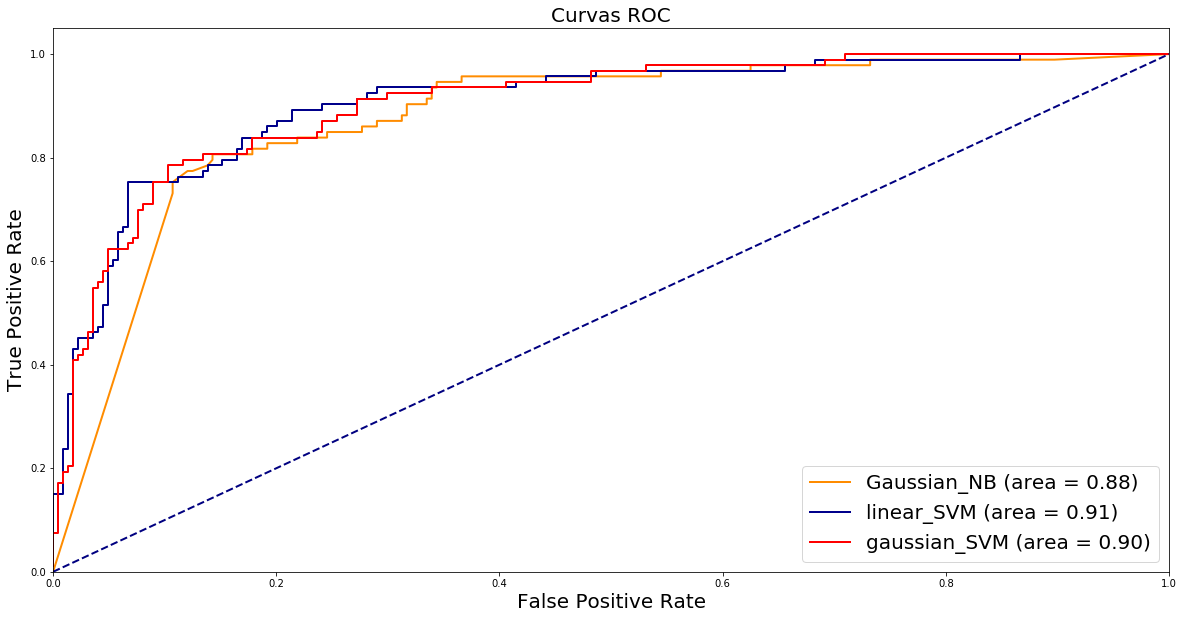

In [38]:
plt.figure(figsize=(20,10))
lw = 2
plt.plot(fpr_gnb,tpr_gnb, color='darkorange',
         lw=lw, label='Gaussian_NB (area = %0.2f)' % auc_gnb)
plt.plot(fpr_svm_l,tpr_svm_l, color='darkblue',
         lw=lw, label='linear_SVM (area = %0.2f)' % auc_svm_l)
plt.plot(fpr_svm_g,tpr_svm_g, color='red',
         lw=lw, label='gaussian_SVM (area = %0.2f)' % auc_svm_g)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Curvas ROC', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

<br>
<font size="4">
<p>
De acuerdo al área bajo la curva ROC, el mejor modelo es linear SVM, y el peor es Gaussian NB.

# Modulo VIII - TALLER
<BR>
<font size="4">

La tarea a desarrollar consiste en el reconocimiento del género de una persona en base a su voz. Para ello, se tiene un dataset de entrenamiento compuesto de 3168 muestras de voz, las cuales están representadas por las siguientes características continuas:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

La última característica representa la clase de la muestra, por lo tanto es la única categórica:
- label: male or female

El dataset se puede obtener de [Kaggle](https://www.kaggle.com/primaryobjects/voicegender/downloads/voicegender.zip).

<font size="4">
<p> <b>Punto 1</b><br>

Lea y preprocese el dataset, de modo que no queden valores nulos y las caracteristicas queden normalizadas (a excepción de la etiqueta). Para ello use un dataframe de pandas. Además, cambie la etiqueta male por -1 y la etiqueta female por 1.

Luego divida los datos de entrenamiento con train/test split en una proporción de 80% entrenamiento, 20% validación.

In [ ]:
#SOLUCION LECTURA
voice_df = pd.read_csv('datasets/voice.csv')

<font size="4">
<p> <b>Punto 2</b><br>

Encuentre los mejores parámetros para un Support Vector Machine con Kernel Gaussiano por medio del uso de Grid Search (sklearn). La metrica a usar debe ser accuracy. Deben usarse 20 folds para crossvalidation. Los intervalos de valores posibles deben ser los siguientes:

- Gamma: $10^{-2}$ hasta $10^1$, saltando por intervalos de potencias ($10^{-2}$,$10^{-1}$,...,$10^{1}$).
- C: $10^-2$ hasta $10^2$, saltando por intervalos de potencias ($10^{-2}$,$10^{1}$,...,$10^{2}$).

***NOTA: Este proceso puede durar unos minutos.***

Cree un clasificador con los mejores parámetros gamma y C y el parámetro Probability=True.

In [41]:
#Creacion del nuevo SVM con los mejores parametros y probability=True
nuevo_svm_taller = svm.SVC(C=10,kernel='rbf',gamma=0.01, probability=True)

<font size="4">
<p> <b>Punto 3</b><br>
Entrene su nuevo modelo con la partición de entrenamiento obtenida en el punto 1. Luego haga predicciones con la partición de validación en términos de probabilidades (predict_proba). Calcule false positive rate y true positive rate usando thresholds con estos valores para finalmente graficar la curva ROC.

# Modulo VIII - QUIZ
<font size="4">
<p> <b>Pregunta 1</b><br>
¿Qué consideración adicional presenta el método de validación de Curvas ROC sobre los métodos de Cross-Validation y Bootstrap?
</p>
<br>
</font>

<font size="4">
<p> <b>Pregunta 2</b><br>
¿Qué método de validación es más recomendable cuando un dataset tiene un número de muestras muy pequeño?
</p>
<br>
</font>

<br>
<font size="4">
<p>
## Referencias
- Alpaydin, E. (2014). Introduction to machine learning. (pp. 107-123) Cambridge, MA: The MIT Press.
- Robust Scaling on Toy Data (2017, March 22). (2015, May 11). Retrieved August 13, 2017, from http://scikit-learn.org/stable/auto_examples/preprocessing/plot_robust_scaling.html
- Markham, K. (2016, June 07). Simple guide to confusion matrix terminology. Retrieved August 14, 2017, from http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013). Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals. Journal of Chemical Information and Modeling, 53, 867-878 Retrieved August 14, 2017 from: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation#
- Bronshtein, A. (2017, May 17). Train/Test Split and Cross Validation in Python – Towards Data Science – Medium. Retrieved August 14, 2017, from https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6
- Receiver Operating Characteristic (ROC)¶.  (2017, March 22). Retrieved August 15, 2017, from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
- Sklearn.model_selection.cross_val_score¶.  (2017, March 22). Retrieved August 15, 2017, from http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html 
- Gender recognition by voice.  Retrieved August 15, 2017, from https://www.kaggle.com/primaryobjects/voicegender